# Laboratorio de Habla 3
Construcción de un Vocoder

* Ejercicio 1: Análisis Exploratorio de la Señal

1. Lea y reproduzca la señal de voz suministrada con este enunciado.

In [1]:
using WAV
señal, fs = wavread("confront.wav")
wavplay(señal,fs)


2. Represente el sonido en el dominio del tiempo.

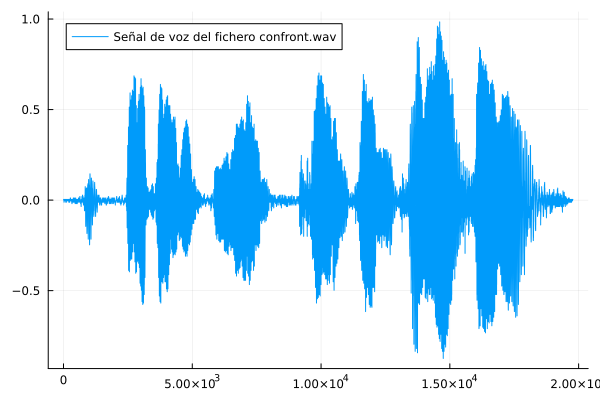

In [2]:
using Plots
plot(señal, label = "Señal de voz del fichero confront.wav" )


3. Represente la energía localizada y la tasa de cruces por cero como función del tiempo, entramando la señal con diferentes tamaños de ventana y usando las primitivas desarrolladas en la práctica 2.

In [3]:
import DSP
import FFTW

segmento = señal[15500:19500]

# Función para calcular la energía con ventana

function energia(s, h)
    n = length(s)
    ventana = hamming(length(h))
    energia = []

    for i in 1:(n - length(h) + 1)
        segmento = s[i:i + length(h) - 1] .* ventana
        push!(energia, sum(segmento .^ 2))
    end

    return energia
end

# Ventanas Hamming diferentes 
ventana_1 = hamming(100)
ventana_2 = hamming(500)
ventana_3 = hamming(1000)

# Obtener la evolución de la energía con el tiempo utilizando diferentes ventanas
energia_1 = energia(segmento, ventana_1)
energia_2 = energia(segmento, ventana_2)
energia_3 = energia(segmento, ventana_3)

# Visualizar la evolución de la energía con diferentes ventanas
plot(energia_1, label="Ventana 1")
plot!(energia_2, label="Ventana 2")
plot!(energia_3, label="Ventana 3")
xlabel!("Muestras")
ylabel!("Energía")
title!("Energía con ventanas de diferentes tamaños")


UndefVarError: UndefVarError: `hamming` not defined

In [4]:
# Función para calcular la tasa de cruces por cero 
function tasa_cruces(s, L)
    n = length(s)
    zcr_values = []

    for i in 1:(n - L + 1)
        segmento = s[i:i + L - 1]
        value = sum(abs.(diff(sign.(segmento)))) / (2 * L)
        push!(zcr_values, value)
    end

    return zcr_values
end

# Calcular la tasa de cruces por cero
L = 5 # Longitud de la ventana 
zcr_values_1 = tasa_cruces(segmento, length(ventana_1))
zcr_values_2 = tasa_cruces(segmento, length(ventana_2))
zcr_values_3 = tasa_cruces(segmento, length(ventana_3))


# Visualizar la tasa de cruces por cero
plot(zcr_values_1, label="ventana 1")
plot!(zcr_values_2, label="ventana 2")
plot!(zcr_values_3, label="Ventana 3")
xlabel!("Muestras")
ylabel!("Tasa de cruces por cero")
title!("Tamaño de Ventana en la Tasa de Cruces por Cero para cada ventana")



UndefVarError: UndefVarError: `ventana_1` not defined

* Ejercicio 2: Análisis de una trama
1. Seleccione y visualice en el tiempo y la frecuencia una trama sonora de la señal.

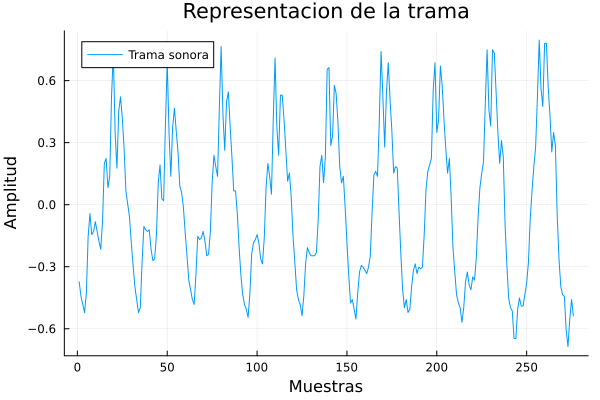

In [5]:
trama = señal[14200:14475]
plot(trama, label="Trama sonora", xlabel="Muestras", ylabel="Amplitud", title="Representacion de la trama")

2. Obtenga la función de autocorrelación de la trama usando una función xcorr que reciba una trama y un orden y obtenga el vector de autocorrelación de ese orden.

In [6]:
# Calcular las autocorrelaciones
c = xcorr(trama, trama)

# Obtener los desplazamientos correspondientes
k = -(length(trama)-1):(length(trama)-1)

# Graficar las autocorrelaciones
plot(
    plot(k, c, label="Trama", title="Autocorrelación de la trama", xlabel="Desplazamiento", ylabel="Autocorrelación")
)

UndefVarError: UndefVarError: `xcorr` not defined